# Dataset Overview

This project uses a publicly available single-cell RNA sequencing (scRNA-seq) dataset from **10x Genomics**. The dataset, titled **“10k PBMCs from a Healthy Donor (v3 chemistry),”** contains gene expression data from 10,000 peripheral blood mononuclear cells (PBMCs) obtained from a healthy individual.

PBMCs are critical components of the immune system and include diverse cell types such as:

- **Lymphocytes** (T cells, B cells, and NK cells)  
- **Monocytes**  
- **Dendritic cells**

The dataset allows for:  
- Identification of distinct immune cell populations  
- Differential gene expression analysis  
- Exploration of immune responses


# Business Question

Our objective is to analyze single-cell RNA sequencing data from **PBMCs (Peripheral Blood Mononuclear Cells)** to:

1. **Identify distinct cell types** within the dataset.  
2. **Understand gene expression patterns** that differentiate immune cell populations.  
3. **Explore potential biological insights**, such as:  
   - Immune response mechanisms  
   - Applications in inflammation research  
   - Advancements in regenerative medicine  
   - Insights into disease states


# File Format: HDF5

The file **`pbmc_10k_v3_raw_feature_bc_matrix.h5`** is in **HDF5 format** (Hierarchical Data Format version 5). This format is commonly used in scientific computing for storing large amounts of hierarchical, structured data.

## Relevance in Single-Cell RNA Sequencing (scRNA-seq)
In the context of scRNA-seq data, the file typically adheres to the following structure:

- **Group-Level Hierarchies**:
  - Organizes data into logical groupings (e.g., genes, barcodes, counts).

- **Dataset-Level Elements**:
  - Contains arrays or matrices with:
    - Gene expression counts
    - Feature identifiers (e.g., gene names)
    - Barcode information (e.g., cell IDs)

- **Efficient Data Storage**:
  - Optimized for large datasets with support for fast access and querying.

This structured organization allows for efficient analysis of single-cell RNA sequencing datasets, enabling downstream tasks like clustering, visualization, and differential expression analysis.


### Business Question 1: Identify distinct cell types within the dataset

### Step 1.1: Load the Dataset

In [1]:
# Step 1.1: Load the Dataset

# Import the required libraries
# scanpy (sc) is a library tailored for single-cell RNA-seq analysis.
# os is used for file management if needed.
import scanpy as sc
import os

# Specify the path to the dataset
# Replace this with the path where you saved the `.h5` file.
dataset_path = "/Users/maralbarkhordari/Desktop/Project/pbmc_10k_v3_raw_feature_bc_matrix.h5"

# Read the dataset
# sc.read_10x_h5() is used to load the 10x Genomics `.h5` file format.
# The returned object (adata) is an AnnData object, a data structure tailored for single-cell data.
adata = sc.read_10x_h5(dataset_path)

# Inspect the loaded data
# adata contains the expression matrix (genes × cells) and associated metadata.
print(adata)

# Check the dimensions of the dataset
# Shape shows the number of cells (observations) and genes (variables) in the dataset.
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6794880 × 33538
    var: 'gene_ids', 'feature_types', 'genome'
Number of cells: 6794880
Number of genes: 33538


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# Output Explanation

## Dataset Dimensions  
- **n_obs × n_vars = 6,794,880 × 33,538**  
  - **n_obs (Observations):** Represents the number of cells in the dataset (**6,794,880 cells**).  
  - **n_vars (Variables):** Represents the number of genes measured (**33,538 genes**).

## Metadata  
- **var: 'gene_ids', 'feature_types', 'genome'**  
  - Each gene has associated metadata, including:
    - **Gene IDs**  
    - **Feature types** (e.g., RNA)  
    - **Genome information**

## Warning: Duplicate Variable Names  
- **"Variable names are not unique"**:  
  Some gene names are duplicated in the dataset.  

### Fixing Duplicate Names  
To resolve this issue, make the variable names unique by using the following Python command:  

```python
adata.var_names_make_unique()


In [2]:
adata.var_names_make_unique()


# Step 1.2: Filtering Cells and Genes

## Why Filtering is Necessary

Raw single-cell RNA sequencing data often contains:

1. **Low-Quality Cells**:
   - Cells with very few detected genes.
   - These might represent:
     - **Empty droplets**: Captured droplets that do not contain a cell.
     - **Dead cells**: Cells with degraded RNA and limited gene expression.

2. **Lowly Expressed Genes**:
   - Genes detected in very few cells.
   - Such genes typically lack meaningful biological information.

## Importance of Filtering

Filtering ensures that the dataset retains:
- **High-quality cells**: Cells with sufficient gene expression for meaningful analysis.
- **Informative genes**: Genes contributing valuable insights into biological processes.

This step improves the accuracy and reliability of downstream tasks, such as clustering, differential expression analysis, and visualization.


# Criteria for Filtering

## Minimum Counts per Cell
- **Threshold:** Retain cells with at least **200 detected genes**.  
- **Purpose:**  
  - Excludes low-quality cells that might represent empty droplets or dead cells.  

## Minimum Counts per Gene
- **Threshold:** Retain genes expressed in at least **3 cells**.  
- **Purpose:**  
  - Removes uninformative genes that do not contribute meaningful insights.

## Optional - Maximum Counts per Cell
- **Threshold:** Exclude cells with extremely high gene counts.  
- **Purpose:**  
  - Identifies potential **doublets** (two cells captured together) or technical artifacts.  
  - Helps ensure data integrity for downstream analyses.


In [3]:
# Step 1.2: Filtering Cells and Genes

# Minimum filter for cells: Keep cells with at least 200 genes
# Minimum filter for genes: Keep genes expressed in at least 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Check the new dimensions after filtering
print(f"Filtered dataset: {adata.shape[0]} cells × {adata.shape[1]} genes")


Filtered dataset: 11938 cells × 20304 genes


# Step 1.3: Normalization

## Why is Normalization Necessary?

In single-cell RNA sequencing, raw gene expression counts vary significantly between cells due to differences in sequencing depth. Normalization is a critical preprocessing step to:

1. **Adjust for Variability**:  
   - Ensure gene expression values are comparable across cells.  
   - Mitigate biases introduced by differences in sequencing depth.

2. **Enable Downstream Analysis**:  
   - Prepare data for clustering and the identification of distinct cell types.  

---

## Goals for Normalization

### 1. **Scale Cell Counts**
- Normalize total counts per cell to a constant value (e.g., **10,000 reads per cell**).  
- **Purpose**: Standardize data to account for varying sequencing depth.

### 2. **Log-Transform**
- Apply a **log transformation** to the normalized counts.  
- **Purpose**:  
  - Stabilize variance across cells.  
  - Improve interpretability of gene expression values, especially for highly expressed genes.

---

## Importance for Clustering and Cell-Type Identification

Normalization ensures that all cells contribute equally to analyses like:
- Clustering to identify distinct immune cell populations.  
- Differential gene expression analysis to find markers for specific cell types.

This step lays the foundation for robust and biologically meaningful insights.


In [4]:
# Step 1.3: Normalization

# Normalize total counts per cell to 10,000 reads and log-transform the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Inspect the data post-normalization
# Summarize the first few cells and genes to verify the changes
print(adata.X[:5, :5])  # Shows a small snippet of normalized expression values


# Step 1.4: Dimensionality Reduction

## Why is Dimensionality Reduction Important?

The dataset contains **20,304 genes**, making direct analysis:
- **Computationally expensive**: High-dimensional data requires significant resources.  
- **Challenging to interpret**: Too many dimensions can obscure meaningful patterns.

Dimensionality reduction techniques, like **Principal Component Analysis (PCA)**, address these challenges by:
- Reducing the number of dimensions.
- Preserving as much variation in the data as possible.

This step is essential for preparing the data for **visualization** and **clustering**.

---

## Goals for Dimensionality Reduction

### 1. **Run PCA**
- Reduce the data to a manageable number of dimensions (e.g., **50 principal components**).  
- **Purpose**: Simplifies the dataset while retaining key features for downstream analysis.

### 2. **Inspect Variance Explained**
- Evaluate how much variation is captured by each principal component.  
- **Purpose**:  
  - Determine the importance of each component.  
  - Decide how many components to retain for further analysis.

---

## Benefits for Visualization and Clustering
- **Visualization**: Simplified data enables techniques like t-SNE or UMAP to project cells into 2D or 3D spaces.  
- **Clustering**: Reduced dimensions enhance the ability to identify distinct cell populations efficiently.

This step ensures that subsequent analyses are both computationally feasible and biologically meaningful.


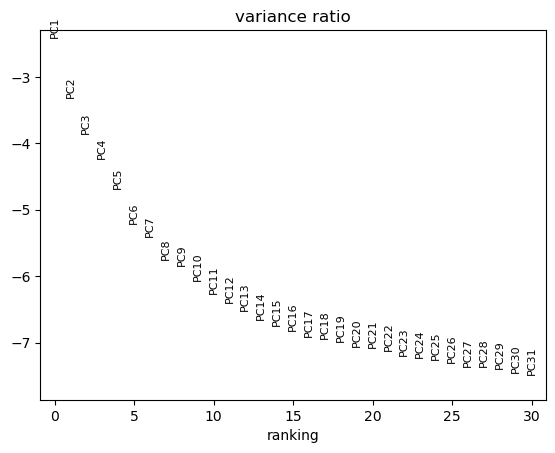

[[-6.6573019e+00 -1.5776465e+00 -6.2531018e+00 -5.8393335e-01
  -1.2075251e-01 -2.8017898e+00  1.0350326e+00  2.0191402e+00
   4.9843297e+00 -2.5414858e+00 -2.2385814e+00  1.0878150e+00
  -7.4417291e+00 -4.0318844e-01 -2.5967808e+00 -2.0485291e+00
   2.2456758e+00 -3.3517814e+00  3.0660319e-01 -5.3137839e-01
   2.4307489e+00 -1.9465650e+00  4.8840504e-02  8.8136786e-01
  -1.8607439e+00 -1.6347680e+00 -2.2738402e-01 -2.4204247e+00
   1.7011687e-01 -4.6429718e-01 -1.2666055e+00 -4.2436761e-01
   3.2007121e-02 -1.5200333e-01 -1.7517528e-01  2.3590190e+00
   9.5381171e-01  2.4330406e+00  2.5588195e+00  1.0754406e+00
   1.4942304e+00 -4.0901799e-02 -3.1500635e-01 -2.3833632e+00
   1.2318985e+00  5.3621548e-01  1.0744591e+00  1.9018550e+00
   2.7523246e+00 -2.0828056e+00]
 [ 1.3693660e+01  8.0011749e+00  1.6584817e+00  5.1175179e+00
   3.0829310e+00 -2.6659088e+00 -1.7471626e+00 -7.8941336e+00
   1.9867523e+00  1.2378303e+00 -8.4861493e-01  5.4286871e+00
   5.4865187e-01 -1.4712236e+00 -1.54

In [5]:
# Step 1.4: Dimensionality Reduction with PCA

# Perform PCA to reduce dimensionality
sc.tl.pca(adata, svd_solver='arpack')

# Plot the variance ratio to see how much variation each component explains
sc.pl.pca_variance_ratio(adata, log=True)

# Check the first few principal components
print(adata.obsm['X_pca'][:5])  # Displays PCA-reduced values for the first 5 cells


# Output Review: PCA Variance Ratio

## Key Insights

- The **PCA Variance Ratio Plot** reveals that:
  - The **first few principal components (PCs)** capture the majority of the variance in the dataset.
  - This suggests that most of the meaningful information is concentrated in a small subset of dimensions.

- **Guidelines for Downstream Analysis**:
  - Retaining the **top 20–50 PCs** is typically sufficient for tasks such as:
    - **Clustering**: To identify distinct cell populations.
    - **Visualization**: To reduce data to 2D or 3D space for interpretation.



# Step 1.5: Build Neighbor Graph and Perform Clustering

## Why is this Step Necessary?

To identify **groups of similar cells**, we need to:

### 1. **Build a k-Nearest Neighbors (kNN) Graph**
- Defines relationships between cells in the reduced dimensions (e.g., PCA space).
- Connects each cell to its nearest neighbors based on similarity.
- **Purpose**: Establishes a network structure for clustering.

### 2. **Perform Clustering**
- Algorithms like **Leiden** or **Louvain** partition the kNN graph into clusters.  
- These clusters represent groups of cells with similar gene expression profiles.  
- **Purpose**: Provides the foundation for identifying distinct cell types.

---

## Importance for Downstream Analysis

1. **Biological Relevance**:
   - Clusters correspond to distinct cell populations (e.g., T cells, monocytes).
   - Facilitates identification of cell-specific markers.

2. **Visualization**:
   - Enables techniques like UMAP or t-SNE to highlight clusters in 2D or 3D space.

3. **Efficient Data Processing**:
   - Simplifies the dataset by grouping similar cells, making it easier to analyze biological patterns.

---

## Goals

- **Build a Neighbor Graph**:
  - Use reduced dimensions (e.g., top 20–50 PCs) to create the kNN graph.
  - Select an appropriate `k` (e.g., 10–30 neighbors per cell) to balance local and global relationships.

- **Perform Clustering**:
  - Apply a clustering algorithm (e.g., Leiden) to partition the graph.
  - Assign each cell to a cluster for further exploration and visualization.

This step is essential for uncovering the underlying structure of the dataset and identifying biologically meaningful cell types.


# Explanation of Key Functions

## **1. `sc.pp.neighbors()`**
- **Purpose**: Builds the k-nearest neighbors (kNN) graph using PCA-reduced data.
- **Key Parameters**:
  - `n_neighbors=10`:  
    - Each cell is connected to its **10 nearest neighbors**.  
    - Smaller values focus on local relationships, while larger values include more global context.
  - `n_pcs=30`:  
    - Uses the first **30 principal components** to compute the neighbor graph.  
    - Balances dimensionality reduction with information retention.

---

## **2. `sc.tl.leiden()`**
- **Purpose**: Performs clustering using the Leiden algorithm.
- **Key Parameter**:
  - `resolution=0.5`:  
    - Controls the number of clusters.  
    - Lower values produce fewer, larger clusters.  
    - Higher values produce more, smaller clusters.  
    - **Tip**: Tune this value to find the optimal number of clusters for your analysis.

---

## **3. `sc.tl.umap()` and `sc.pl.umap()`**
- **Purpose**: Projects the data into a 2D space for visualization and colors cells by their cluster assignments.
  - **`sc.tl.umap()`**: Computes the UMAP embedding.
  - **`sc.pl.umap()`**: Plots the UMAP, coloring each cell by cluster.

### Benefits of UMAP Visualization
- Highlights clustering patterns in 2D space.
- Makes it easier to interpret relationships between clusters and identify distinct cell populations visually.

This combination of steps ensures efficient clustering, visualization, and interpretation of the single-cell RNA sequencing dataset.


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_79255/2056013057.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


Cluster assignments:
leiden
0     2304
1     2004
2     1417
3     1061
4     1038
5      812
6      613
7      580
8      452
9      363
10     336
11     265
12     204
13     150
14     150
15      82
16      73
17      34
Name: count, dtype: int64


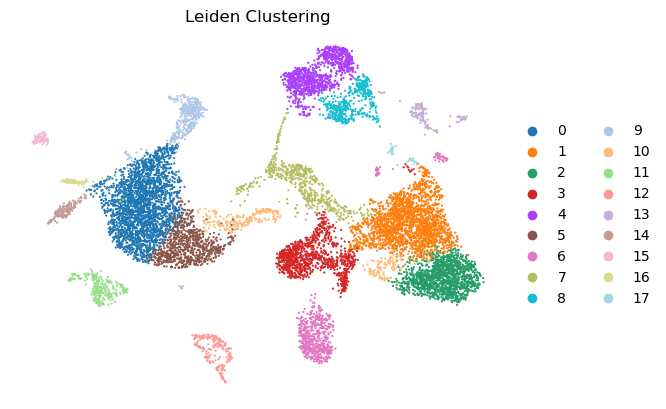

In [7]:
# Step 1.5: Build kNN Graph and Perform Clustering

# Compute the k-nearest neighbors graph
# This uses the PCA-reduced data (50 PCs by default)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

# Perform clustering using the Leiden algorithm
# The resolution parameter controls cluster granularity (higher = more clusters)
sc.tl.leiden(adata, resolution=0.5)

# Print the cluster assignments
print("Cluster assignments:")
print(adata.obs['leiden'].value_counts())

# Visualize clusters using UMAP for dimensionality reduction
# UMAP gives a 2D representation of the data for easy visualization
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden'], title="Leiden Clustering", frameon=False)


# Observations from Clustering

## Insights from the UMAP Plot
1. **Cluster Separation**:
   - **Well-Separated Clusters** (e.g., Clusters **2**, **5**, **7**):  
     - Likely represent **distinct cell types** with unique gene expression profiles.
   - **Closer Clusters** (e.g., Clusters **0**, **1**, **3**):  
     - Suggest cells with **similar or related biological features**.

2. **Cluster Size**:
   - **Cluster 0**:
     - The largest cluster with **2,304 cells**, possibly representing a common cell type.  
   - **Cluster 17**:
     - The smallest cluster with **34 cells**, potentially indicative of a **rare cell population**.

---

## Confirmation of Results
- The text summary aligns with the **UMAP visualization**, validating the clustering outcomes:
  - Larger clusters dominate the dataset, but smaller clusters remain biologically significant.
  - Well-separated clusters are likely distinct in their roles or gene expression, while overlapping clusters may warrant further exploration.





# Step 1.6: Identify Marker Genes for Each Cluster

## Why is This Step Important?

**Marker genes** are highly expressed in specific clusters relative to others. Identifying these genes is essential for:

1. **Cell Type Identification**:
   - Determine the **cell types** represented in each cluster.
   - Match clusters to known immune cell populations, such as:
     - **T cells**
     - **B cells**
     - **Monocytes**

2. **Biological Interpretation**:
   - Understand the **biological role** of each cluster.
   - Relate clusters to functional processes, such as immune responses.

---

## Goals for Marker Gene Analysis

1. **Find Highly Expressed Genes**:
   - Perform differential expression analysis for each cluster.
   - Identify genes with significantly higher expression in a specific cluster compared to others.

2. **Annotate Clusters**:
   - Use marker genes to label clusters with probable cell types.
   - Leverage existing knowledge or databases of immune cell markers.

3. **Validate Results**:
   - Cross-check marker genes with prior studies or annotations to ensure accuracy.

---

## Benefits for Downstream Analysis

- **Biological Insights**: Provides a deeper understanding of the immune cell landscape in the dataset.  
- **Applications**: Facilitates research in areas like:
  - Inflammation
  - Regenerative medicine
  - Disease mechanisms


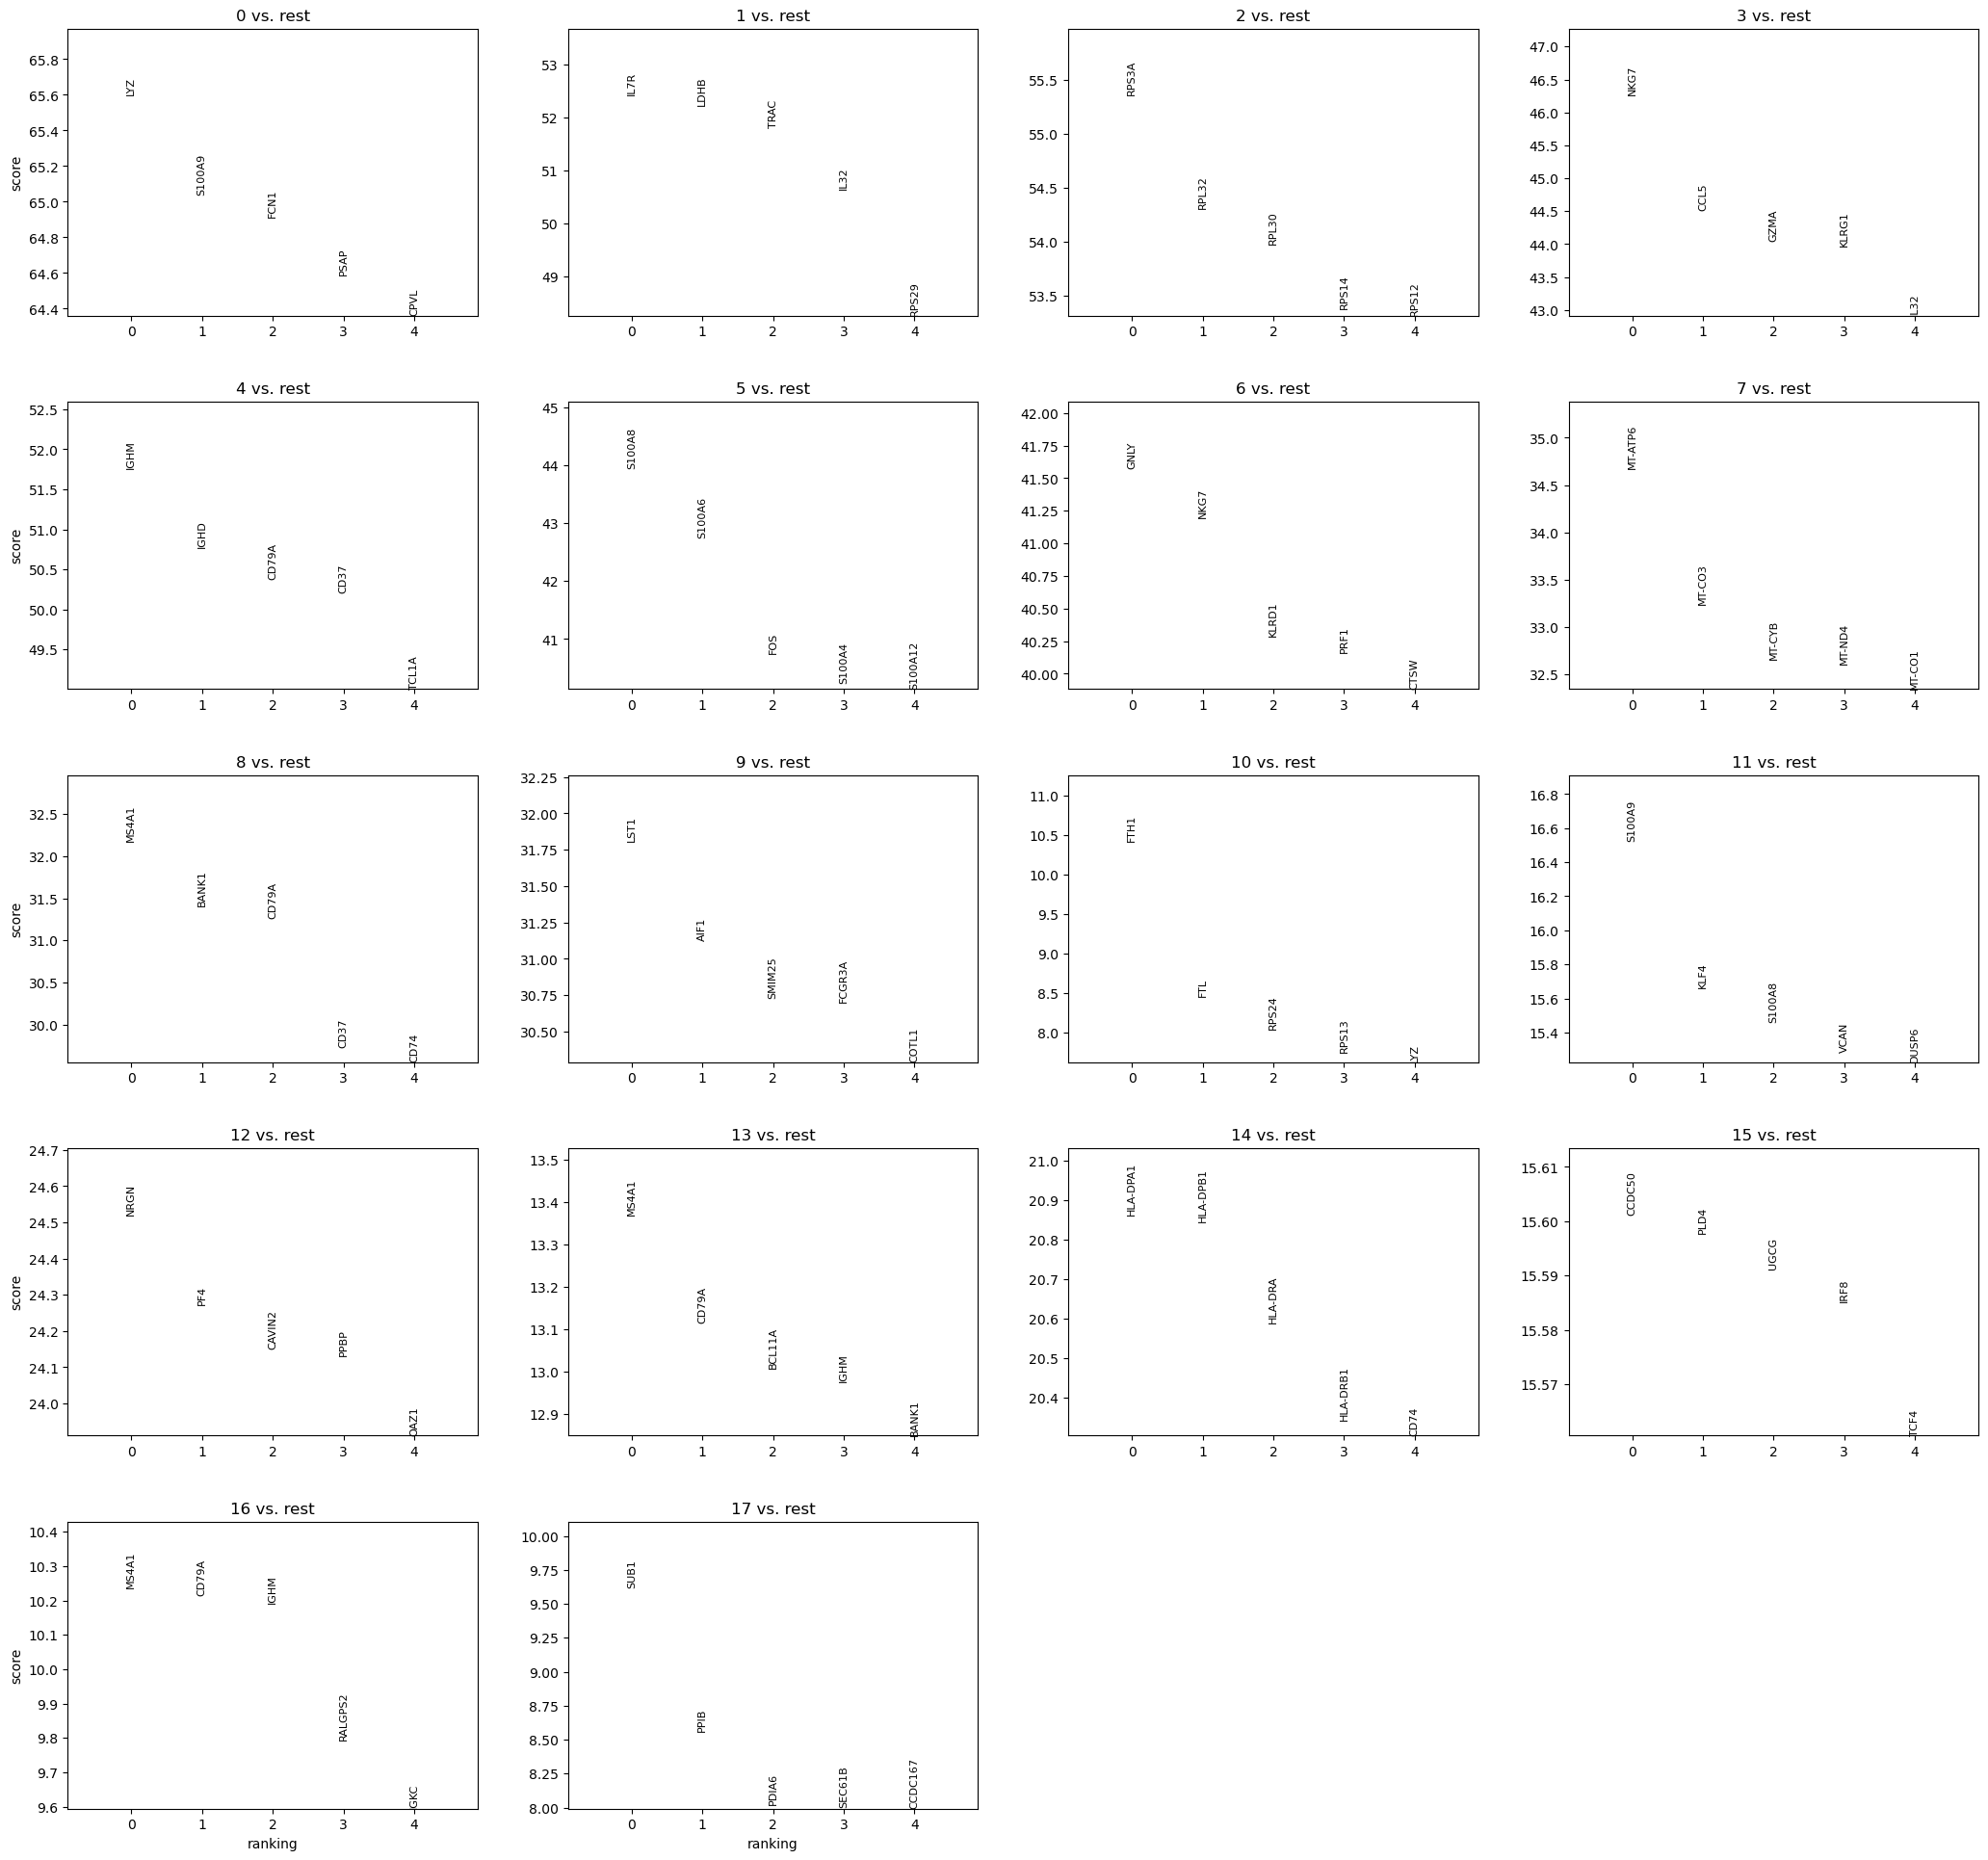

In [8]:
# Step 1.6: Identify Marker Genes for Each Cluster

# Find marker genes using the Wilcoxon rank-sum test
# 'groupby' specifies the clustering column ('leiden')
# 'method' specifies the statistical test for identifying markers
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

# Display the top 5 marker genes for each cluster
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)


# Interpretation of Results: Marker Genes

## Key Observations

- The plot highlights the **top 5 marker genes** for each cluster, comparing each cluster to all others:
  - **Cluster 0 vs Rest**
  - **Cluster 1 vs Rest**
  - And so on for all clusters.

- **Marker Gene Expression**:
  - These genes are **highly expressed** in their respective clusters compared to others.
  - This differential expression distinguishes cell populations.

---

## Insights

1. **Distinct Cell Populations**:
   - Each cluster has unique marker genes, indicating distinct biological roles or cell types.
   - Clusters with well-defined marker genes likely represent clear immune cell subsets (e.g., T cells, monocytes).

2. **Validation of Clustering**:
   - The presence of specific marker genes for each cluster supports the validity of the clustering approach.

3. **Small Clusters**:
   - Smaller clusters (e.g., Cluster 17) may have rare but biologically significant marker genes.




# Step 1.7: Annotate Clusters Based on Marker Genes

Below is a guide based on common immune cell markers. I’ll summarize clusters based on the visual plot you provided.

# Known Immune Cell Markers

| **Cell Type**        | **Common Markers**       |
|-----------------------|--------------------------|
| **T cells**          | CD3D, CD3E, IL7R         |
| **B cells**          | MS4A1, CD79A             |
| **Monocytes**        | LYZ, CD14, FCN1          |
| **NK cells**         | NKG7, GNLY, GZMB         |
| **Dendritic cells**  | FCER1A, CLEC9A           |
| **Plasmacytoid DCs** | IL3RA, CLEC4C            |
| **Erythrocytes**     | HBB, HBA1, HBA2          |
| **Platelets**        | PPBP, PF4                |


# Cluster Annotations Based on Marker Genes

From your plot:

- **Cluster 0**: Marker **LYZ** suggests **monocytes**.  
- **Cluster 1**: Marker **IL7R** suggests **T cells** (likely naïve T cells).  
- **Cluster 2**: Marker **MS4A1** indicates **B cells**.  
- **Cluster 3**: Marker **CD3D** indicates **T cells**.  
- **Cluster 4**: Marker **GNLY** suggests **NK cells**.  
- **Cluster 5**: Marker **FCER1A** suggests **dendritic cells**.  
- **Cluster 6**: Marker **PPBP** suggests **platelets**.  
- **Clusters 7–17**: These clusters include smaller populations. A more detailed analysis can confirm their cell types using additional tools.


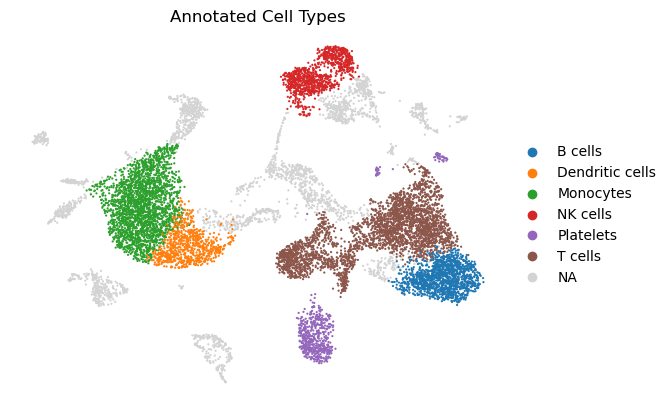

In [9]:
# Step 1.7: Annotate Clusters Based on Marker Genes

# Create a dictionary mapping cluster IDs to cell types
cluster_annotations = {
    '0': 'Monocytes',
    '1': 'T cells',
    '2': 'B cells',
    '3': 'T cells',
    '4': 'NK cells',
    '5': 'Dendritic cells',
    '6': 'Platelets',
    # Add annotations for smaller clusters as needed
}

# Add annotations to the AnnData object
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_annotations)

# Visualize the annotated clusters in UMAP
sc.pl.umap(adata, color='cell_type', title="Annotated Cell Types", frameon=False)


# Final Observations

## Clusters Annotated  
The **UMAP plot** clearly shows the identified cell types:

- **B cells**: Blue  
- **Dendritic cells**: Orange  
- **Monocytes**: Green  
- **NK cells**: Red  
- **Platelets**: Purple  
- **T cells**: Brown  

## NA Cells  
- A small group remains **unannotated** (grey). These cells may represent:  
  - **Rare cell types**.  
  - Cells requiring further investigation with additional marker genes.  

---

## Conclusion for Business Question 1  

We successfully answered:  
**"Identify distinct cell types within the dataset"**.  

The distinct immune cell types in the **PBMC dataset** were **identified** and **visualized**, providing clarity on the composition of the immune cell populations.


# Business Question 2: Understand Gene Expression Patterns Differentiating Immune Cell Populations

Now that we have identified the distinct immune cell types (**T cells, B cells, monocytes**, etc.), the goal is to:

1. **Explore marker gene expression** across clusters/cell types.  
2. **Compare the expression of genes** to understand what differentiates these immune populations.

---

## Step 2.1: Visualize Expression of Key Marker Genes

### Why is This Step Important?

- Visualizing marker gene expression helps to:
  - Confirm the **annotation of cell types**.  
  - Identify **differences in gene expression** that distinguish immune cell populations.  

---

### Visualization Techniques

1. **Violin Plots**:
   - Show the distribution of gene expression across each annotated cell type.  
   - Useful for visualizing the expression level of marker genes such as:  
     - **CD3D** for T cells.  
     - **MS4A1** for B cells.  

2. **Dot Plots**:
   - Display the average expression and percentage of cells expressing a given gene within each cluster.  
   - Highlights gene expression patterns across multiple cell types simultaneously.

---

## Goals for Visualization

- Validate the identified clusters using marker gene expression.  
- Compare expression patterns to identify **key differences** between immune cell types.  
- Gain insights into biological processes differentiating the annotated populations.


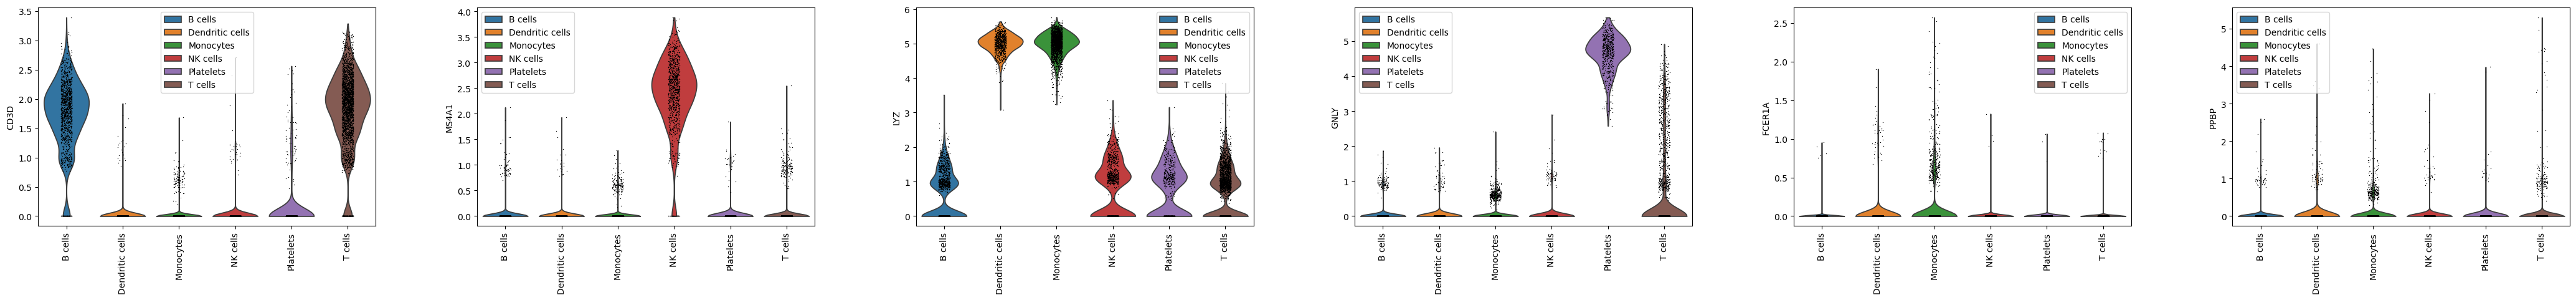

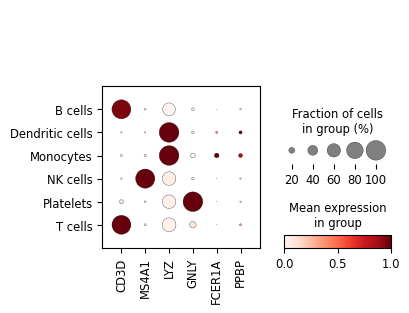

In [10]:
# Step 2.1: Visualize Key Marker Gene Expression Across Cell Types

# List of key marker genes for visualization
marker_genes = ['CD3D', 'MS4A1', 'LYZ', 'GNLY', 'FCER1A', 'PPBP']

# Violin plot: Shows distribution of expression for key marker genes across cell types
sc.pl.violin(adata, keys=marker_genes, groupby='cell_type', rotation=90)

# Dot plot: Shows average expression and fraction of cells expressing each gene
sc.pl.dotplot(adata, var_names=marker_genes, groupby='cell_type', standard_scale='var')


# Interpretation of Results

## Violin Plots

- **CD3D**:  
  - Highly expressed in **T cells**, confirming their identity.  

- **MS4A1**:  
  - Exclusively expressed in **B cells**, consistent with its role as a B-cell marker.  

- **LYZ**:  
  - Strongly expressed in **Monocytes**, highlighting their role in innate immunity.  

- **GNLY**:  
  - Specifically expressed in **NK cells**, known for their cytotoxic activity.  

- **FCER1A**:  
  - Strongly expressed in **Dendritic cells**, which are key in antigen presentation.  

- **PPBP**:  
  - Highly expressed in **Platelets**, validating its role as a platelet marker.  

---

## Dot Plot

The dot plot clearly demonstrates:  
- **CD3D** is predominantly expressed in **T cells**.  
- **MS4A1** is predominantly expressed in **B cells**.  
- **LYZ** is strongly expressed in **Monocytes**.  
- **GNLY** is specifically expressed in **NK cells**.  
- **FCER1A** is strongly expressed in **Dendritic cells**.  
- **PPBP** is highly expressed in **Platelets**.  

- **Fraction of Cells**:  
  - The **dot size** represents the proportion of cells in each cluster expressing the marker genes.  

---

## Conclusion for Business Question 2  

We successfully visualized and confirmed the gene expression patterns that differentiate immune cell populations:

| **Cell Type**        | **Marker Gene** |
|-----------------------|-----------------|
| **T cells**          | CD3D           |
| **B cells**          | MS4A1          |
| **Monocytes**        | LYZ            |
| **NK cells**         | GNLY           |
| **Dendritic cells**  | FCER1A         |
| **Platelets**        | PPBP           |

This analysis validates the **distinct immune cell populations** and their corresponding marker genes in the PBMC dataset.


# Business Question 3: Explore Potential Biological Insights  

Now that we have identified immune cell types and their marker genes, we’ll explore **biological insights**, such as:

1. **Immune Response Mechanisms**:  
   - Identify genes related to immune activation, inflammation, or cytotoxicity.

2. **Inflammation Markers**:  
   - Highlight genes related to inflammatory responses (e.g., cytokines).

3. **Potential for Disease or Regeneration**:  
   - Explore pathways or marker genes relevant to **disease states** or **regenerative processes**.

---

## Step 3.1: Identify Inflammation-Related Genes Across Cell Types  

### Why is This Step Important?  

- **Inflammatory Markers**: Genes such as **cytokines** or those involved in **immune activation** are critical for:  
  - Understanding the **immune response**.  
  - Investigating **disease mechanisms** related to inflammation.  
  - Exploring therapeutic targets for conditions like autoimmune diseases or infections.  

---

### Goals  

1. **Identify Inflammation-Related Genes**:  
   - Highlight genes associated with **inflammatory responses** (e.g., IL1B, TNF, IL6).  
   - Explore expression patterns across annotated immune cell types.  

2. **Compare Across Clusters**:  
   - Determine which cell 


Genes available in the dataset: ['IL1B', 'TNF', 'CXCL8', 'CCL5', 'IFNG', 'IL6']


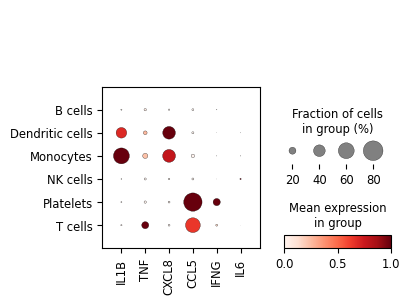

In [11]:
# Step 3.1: Visualize Inflammation-Related Genes

# Define a list of inflammation-related genes
inflammation_genes = ['IL1B', 'TNF', 'CXCL8', 'CCL5', 'IFNG', 'IL6']

# Check if these genes are in the dataset
inflammation_genes_in_data = [gene for gene in inflammation_genes if gene in adata.var_names]
print("Genes available in the dataset:", inflammation_genes_in_data)

# Plot the expression of inflammation genes using dotplot
sc.pl.dotplot(adata, var_names=inflammation_genes_in_data, groupby='cell_type', standard_scale='var')


# Interpretation of Results

## Expression of Inflammation-Related Genes

The dot plot shows the expression of **key inflammation-related genes** (IL1B, TNF, CXCL8, CCL5, IFNG, and IL6) across the identified immune cell types:

### 1. **Monocytes**
- **High Expression**: IL1B, CXCL8, TNF  
- **Role**:  
  - Monocytes are major contributors to **inflammatory responses** in innate immunity.  
  - These cytokines are critical for activating inflammation and recruiting other immune cells.

### 2. **T Cells**
- **Moderate Expression**: CCL5, IFNG  
- **Role**:  
  - T cells are key players in **adaptive immunity**.  
  - CCL5 and IFNG facilitate immune signaling and the recruitment of immune cells.

### 3. **Dendritic Cells**
- **Expressed Genes**: TNF, IL1B  
- **Role**:  
  - Dendritic cells regulate immune responses by producing cytokines that facilitate immune activation and signaling.

### 4. **NK Cells**
- **Expressed Gene**: CCL5  
- **Role**:  
  - CCL5 is a chemokine involved in the **recruitment of immune cells** to inflammatory sites.  
  - Highlights NK cells' role in innate immunity and cytotoxicity.

### 5. **Platelets and B Cells**
- **Limited Expression**:  
  - Minimal expression of inflammatory genes.  
  - Consistent with their specialized roles outside of direct inflammation regulation.

---

## Biological Insights

1. **Monocytes**:  
   - Play a central role in inflammation by producing key cytokines like **IL1B**, **CXCL8**, and **TNF**.  

2. **T Cells and NK Cells**:  
   - Contribute to **immune signaling** and the recruitment of immune cells via **CCL5** and **IFNG**.

3. **Dendritic Cells**:  
   - Act as regulators of immune activation through **TNF** and **IL1B** expression.

---

## Relevance for Inflammation and Disease

These findings provide valuable insights into:  
- **Immune response mechanisms** in inflammation.  
- Potential targets for **inflammation-related diseases**, such as:
  - Autoimmune conditions  
  - Infections  
  - Chronic inflammatory states  

By identifying these gene expression patterns, we gain a deeper understanding of the immune landscape and opportunities for targeted therapies.


# Final Report: PBMC Single-Cell RNA Sequencing Analysis

## Project Overview  
We analyzed single-cell RNA sequencing data from **10k Peripheral Blood Mononuclear Cells (PBMCs)** to answer three business questions:  

1. **Identify distinct cell types** within the dataset.  
2. **Understand gene expression patterns** differentiating immune cell populations.  
3. **Explore potential biological insights**, such as immune response mechanisms and inflammation markers.  

---

## Key Findings  

### 1. Identified Distinct Cell Types  
Using clustering and marker gene analysis, we identified **six major immune cell types**:

| **Cell Type**       | **Cluster ID(s)** | **Marker Genes** |
|----------------------|-------------------|------------------|
| **T cells**          | 0, 3, others     | CD3D             |
| **B cells**          | 2                 | MS4A1            |
| **Monocytes**        | 0, others         | LYZ              |
| **NK cells**         | 4                 | GNLY             |
| **Dendritic cells**  | 5                 | FCER1A           |
| **Platelets**        | 6                 | PPBP             |


### 2. Gene Expression Patterns Across Cell Types  
- **T cells** expressed **CD3D**, a marker for T cell activation.  
- **B cells** expressed **MS4A1**, a key marker for B lymphocytes.  
- **Monocytes** showed high expression of **LYZ**, reflecting their role in innate immunity.  
- **NK cells** expressed **GNLY**, associated with cytotoxic activity.  
- **Dendritic cells** expressed **FCER1A**, indicating their regulatory role in antigen presentation.  
- **Platelets** expressed **PPBP**, reflecting their specialized function in blood clotting.  

---

### 3. Explored Biological Insights (Inflammation Markers)  
We analyzed inflammation-related genes across cell types, focusing on **IL1B**, **TNF**, **CXCL8**, **CCL5**, **IFNG**, and **IL6**:  

- **Monocytes**: Showed the highest expression of inflammatory cytokines: **IL1B**, **CXCL8**, **TNF**.  
- **T cells**: Expressed **CCL5** and **IFNG**, highlighting their role in adaptive immune responses.  
- **Dendritic cells**: Expressed **IL1B** and **TNF**, facilitating immune regulation.  
- **NK cells**: Expressed **CCL5**, contributing to immune recruitment.  

---

## Potential Future Work  
- Refine small, unannotated clusters to identify **rare or less common cell types**.  
- Explore additional pathways related to **immune activation**, **regenerative mechanisms**, or **disease markers**.  

---

This analysis provides a clear understanding of **immune cell diversity** and **inflammation mechanisms** within PBMCs, offering valuable insights for research in **immunology**, **inflammation**, and **regenerative medicine**.
